In [0]:
pip install mtcnn

     |████████████████████████████████| 2.3MB 3.4MB/s 


In [0]:
pip install tensorflow

In [0]:
pip install keras

In [0]:
import mtcnn                                                         # Mtcnn,pretrained model specialised for detecting face from image
import numpy as np                                                   # Here numpy will be used for storing records of 'fer2013.csv' dataset in numpy array format
import tensorflow as tf                                              # Tensorflow will be used for starting session for emotion analysis graph
import keras                                                         # Keras is an open-source neural-network library 
from keras.models import Sequential                                  # Sequential model will be used for creating input and convolutional neural networks
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D      # These layers will be used for extracting features and reducing resolution to extract features more deeply
from keras.layers import Dense, Activation, Dropout, Flatten         # These layers will be used to prevent overfitting and in making of fully connected layers 
from keras.preprocessing import image                                # We import image library for processing image
from keras.preprocessing.image import ImageDataGenerator             # ImageDataGenerator will be used to generate image from pixel values from 'fer2013.csv' dataset
import matplotlib.pyplot as plt                                      # We will use pyplot for creating graph and labelling it as 'plt'
from matplotlib import pyplot
from matplotlib.patches import Rectangle                             # We use Rectangle to create window boundary around face detected in image
from matplotlib.patches import Circle                                # We use Circle to mark keypoints like left eye,right eye,nose and mouth on the face
from mtcnn.mtcnn import MTCNN                                        # Multi Task Cascaded Convolutional Neural network,deep learning model will be used for identifying the coordinates of face and keypoints

Using TensorFlow backend.


In [0]:
from google.colab import drive                                       # We import drive from google to use dataset and image
drive.mount('/content/drive')                                        # Mounting drive to use files while inputting


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip -uq "/content/drive/My Drive/ZIPPED FILE/fer2013.zip" -d "/content/drive/My Drive/UNZIPPED FILE"           #Unzipping the zip file of fer2013.zip into UNZIPPED FILE folder
!unzip -uq "/content/drive/My Drive/ZIPPED FILE/dif1.zip" -d "/content/drive/My Drive/UNZIPPED FILE"              #Unzipping the zip file of dif1.zip into UNZIPPED FILE folder
!unzip -uq "/content/drive/My Drive/ZIPPED FILE/different.zip" -d "/content/drive/My Drive/UNZIPPED FILE"         #Unzipping the zip file of different.zip into UNZIPPED FILE folder

In [0]:
config=tf.ConfigProto(device_count={'GPU':0,'CPU':56})              # We will use CPU for this project and start a session for graph 
SESS=tf.Session(config=config)
keras.backend.set_session(SESS)

In [0]:
num_classes=7                                                       # We have 7 emotions ,so we define classes equal to 7
batch_size=256                                                      # At one at a time we will sample 256 instances in convolutional neural network 
epochs=50                                                          # Training will be done for 20 epochs
filename0='/content/drive/My Drive/UNZIPPED FILE/dif1.jpg'          # Giving the link of input image 'dif1.jpg' to 'filename0'
filename1='/content/drive/My Drive/UNZIPPED FILE/different.jpg'     # Giving the link of input image 'different.jpg' to 'filename1'
pixels0=pyplot.imread(filename0)                                    # Reading the pixels values of input image from filename0
pixels1=pyplot.imread(filename1)                                    # Reading the pixels values of input image from filename1
detector=MTCNN()                                                    # Defining  MTCNN() model
FACES0=detector.detect_faces(pixels0)                               # Detecting faces from input image from 'pixels0'
FACES1=detector.detect_faces(pixels1)                               # Detecting faces from input image from 'pixels1'

In [0]:
for face0 in FACES0:                                                # Printing the coordinates  and features or keypoints of each face in input image 'dif1.jpg' 
  print(face0)

{'box': [223, 103, 34, 50], 'confidence': 0.9999955892562866, 'keypoints': {'left_eye': (226, 122), 'right_eye': (240, 126), 'nose': (226, 134), 'mouth_left': (225, 143), 'mouth_right': (236, 145)}}
{'box': [234, 20, 38, 49], 'confidence': 0.9999932050704956, 'keypoints': {'left_eye': (248, 40), 'right_eye': (265, 35), 'nose': (262, 46), 'mouth_left': (254, 58), 'mouth_right': (269, 54)}}
{'box': [7, 110, 34, 43], 'confidence': 0.9999842643737793, 'keypoints': {'left_eye': (17, 127), 'right_eye': (32, 123), 'nose': (28, 135), 'mouth_left': (24, 144), 'mouth_right': (36, 140)}}
{'box': [158, 20, 32, 43], 'confidence': 0.9999667406082153, 'keypoints': {'left_eye': (165, 38), 'right_eye': (180, 37), 'nose': (172, 47), 'mouth_left': (166, 51), 'mouth_right': (182, 50)}}
{'box': [10, 21, 30, 42], 'confidence': 0.9999585151672363, 'keypoints': {'left_eye': (19, 37), 'right_eye': (33, 38), 'nose': (26, 45), 'mouth_left': (17, 51), 'mouth_right': (32, 52)}}
{'box': [86, 15, 34, 45], 'confidenc

In [0]:
for face1 in FACES1:                                                # Printing the coordinates  and features or keypoints of each face in input image 'different.jpg' 
  print(face1)

{'box': [77, 1082, 90, 122], 'confidence': 0.9999998807907104, 'keypoints': {'left_eye': (101, 1132), 'right_eye': (142, 1132), 'nose': (122, 1157), 'mouth_left': (105, 1178), 'mouth_right': (139, 1178)}}
{'box': [877, 1076, 57, 79], 'confidence': 0.9999980926513672, 'keypoints': {'left_eye': (890, 1107), 'right_eye': (917, 1108), 'nose': (901, 1125), 'mouth_left': (890, 1133), 'mouth_right': (917, 1135)}}
{'box': [1130, 38, 81, 112], 'confidence': 0.9999954700469971, 'keypoints': {'left_eye': (1153, 82), 'right_eye': (1191, 84), 'nose': (1173, 105), 'mouth_left': (1156, 124), 'mouth_right': (1186, 124)}}
{'box': [79, 297, 68, 92], 'confidence': 0.99998939037323, 'keypoints': {'left_eye': (98, 334), 'right_eye': (129, 328), 'nose': (119, 346), 'mouth_left': (106, 364), 'mouth_right': (136, 358)}}
{'box': [96, 832, 63, 90], 'confidence': 0.9999843835830688, 'keypoints': {'left_eye': (104, 866), 'right_eye': (130, 869), 'nose': (109, 889), 'mouth_left': (107, 898), 'mouth_right': (133, 8

In [0]:
with open('/content/drive/My Drive/UNZIPPED FILE/fer2013.csv') as f:                      # Opening the 'fer2013.csv' file
  content=f.readlines()                                                                   # Reading the rows of dataset
  lines=np.array(content)                                                                 # Converting instances into numpy arrays

  number_of_instances=lines.size                                                          # Counting the total number of rows in dataset 

print("Number of instances in the fer2013 dataset =",number_of_instances)                 # Printing  total number of rows

print("Instance length of fer2013 dataset =",len(lines[1].split(",")[1].split(" ")))      # Printing the length of a single row of dataset fer2013
  

Number of instances in the fer2013 dataset = 35888
Instance length of fer2013 dataset = 2304


In [0]:
def draw_image_with_boxes(filename, result_list):
	              
	data = pyplot.imread(filename)                                          								# We load the image  from filename

	pyplot.imshow(data)                                            	        								# Plot the image

	ax = pyplot.gca()                                                       								# Get the context for drawing boxes

	for result in result_list:                                              								# Plot each box
		
		x, y, width, height = result['box']		                                								# Get coordinates

		rect = Rectangle((x, y), width, height, fill=False, color='red')      								# Create the shape
		
		ax.add_patch(rect)                                                    								# Draw the box

		for key, value in result['keypoints'].items():                        								# Draw the dots
			
			dot = Circle(value, radius=2, color='red')                          								# Create and draw dot
			ax.add_patch(dot)


	pyplot.show()                                                           								# Show the plot

In [0]:
def draw_faces(filename, result_list):
	# load the image
	data = pyplot.imread(filename)																													# We load the image  from filename
	# plot each face as a subplot
	for i in range(len(result_list)):																												# plot each face as a subplot
		# get coordinates
		x1,y1, width, height = result_list[i]['box']																					# get coordinates
		
		x2, y2 = (x1 + width), (y1 + height)
		# define subplot
		pyplot.subplot(1, len(result_list), i+1)																							# define subplot
		pyplot.axis('off')
		# plot face
		pyplot.imshow(data[y1:y2, x1:x2])# plot face
	# show the plot
	pyplot.show()         																																	# show the plot                                                               

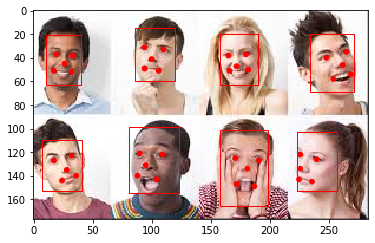

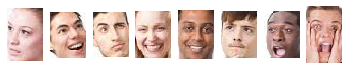

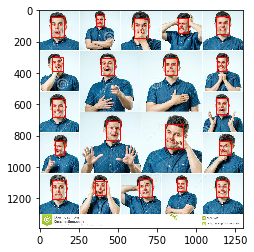

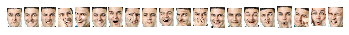

In [0]:
draw_image_with_boxes(filename0, FACES0)                                                  # We display the required result of detecting face and keypoints in image
draw_faces(filename0,FACES0)

draw_image_with_boxes(filename1, FACES1)                                                  # We display the required result of detecting face and keypoints in image
draw_faces(filename1,FACES1)
    

In [0]:
def emotion_analysis(emotions):                                                      # Creating a function emotion_analysis for plotting graph for analyzing emotions
   
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')    # Declaring  emotion  labels as objects
    
    y_pos = np.arange(len(objects))                                                  # Storing the total number of object labels
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)                              # Plotting the bar with respect to "y_pos" and  "emotions"
    plt.xticks(y_pos, objects)                                                       # Plotting emotion labels on X-axis
    plt.ylabel('percentage')                                                         # Plotting the label "percentage" along Y-axis 
    plt.title('emotion')                                                             # Plotting the label "emotion" along X-axis
    
    plt.show()                                                                       # Displaying the final resulting graph


In [0]:
x_train, y_train, x_test, y_test = [], [], [], []                            # Defining four lists for X train, Y train, X test and Y test 

for i in range(1,number_of_instances):                                       # Traversing all the instances in dataset "fer2013.csv"
    try:
        emotion, img, usage = lines[i].split(",")                            # We store each row value of each column in variables "emotion" ,"img" ,"usage"
                                                                             # That is label numbers in "emotion", pixel values of image in "img" and usage labels in"usage"

        val = img.split(" ")                                                 # Storing pixel values seperated by space i.e. " "
            
        pixels = np.array(val, 'float32')                                    # Converting all pixel values datatype from integer to float and storing in numpy array
        
        emotion = keras.utils.to_categorical(emotion, num_classes)           # Defining the number of emotion classes
    
        if 'Training' in usage:                                              # If the instance has the usage label "Training" then we append values of such instance in training lists
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:                                          # If the instance has the usage label "PublicTest" then we append values of such instance in testing lists
            y_test.append(emotion)
            x_test.append(pixels)
    except:
	    print("",end="")
     
print("X train total image pixel values",len(x_train))                       # Displaying the total number of image pixel values in "x_train"
print("Y train total image pixel values",len(y_train))                       # Displaying the total number of image pixel values in "y_train"
print("X test total image pixel values",len(x_test))                         # Displaying the total number of image pixel values in "x_test"
print("Y test total image pixel values",len(y_test))                         # Displaying the total number of image pixel values in "y_test"

X train total image pixel values 28709
Y train total image pixel values 28709
X test total image pixel values 3589
Y test total image pixel values 3589


In [0]:
x_train = np.array(x_train, 'float32')                         # Converting all the  values datatype from integer to float in "x_train" and converting it into numpy array    
y_train = np.array(y_train, 'float32')                         # Converting all the  values datatype from integer to float in "y_train" and converting it into numpy array  
x_test = np.array(x_test, 'float32')                           # Converting all the  values datatype from integer to float in "x_test" and converting it into numpy array  
y_test = np.array(y_test, 'float32')                           # Converting all the  values datatype from integer to float in "y_test" and converting it into numpy array  

x_train /= 255                                                 # Normalize inputs between [0, 1] in "x_train"
x_test /= 255                                                  # Normalize inputs between [0, 1] in "x_test"

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)         # Reshaping the image dimensions to (48,48,1) for inputting in Convolutional Neural Network layers 
x_train = x_train.astype('float32')                            # Defining its datatype as float
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)            # Reshaping the image dimensions to (48,48,1) for inputting in Convolutional Neural Network layers 
x_test = x_test.astype('float32')                              # Defining its datatype as float

print(x_train.shape[0], 'train samples')                       # Displaying the total number of samples used for training
print(x_test.shape[0], 'test samples')                         # Displaying the total number of samples used for testing


28709 train samples
3589 test samples


In [0]:
model = Sequential()                                                       # Defining a Convolutional Neural Network model

                                                                            
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))    # First Convolutional Neural Network layer
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))


model.add(Conv2D(64, (3, 3), activation='relu'))                           # Second  Convolutional Neural Network layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))


model.add(Conv2D(128, (3, 3), activation='relu'))                          # Third  Convolutional Neural Network layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))


model.add(Flatten())                                                       # Creating a flattening layer 


model.add(Dense(1024, activation='relu'))                                  # Fully connected neural networks
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))                        # Output layer 




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [0]:
fit=True																																																							
if fit == True:
	#model.fit_generator(x_train, y_train, epochs=epochs)																														 # Train for all trainset
	model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs) 																 # Train for randomly selected one
else:
	model.load_weights('/data/facial_expression_model_weights.h5') #load weights


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
256/256 [==============================] - 448s 2s/step - loss: 1.7872 - acc: 0.2601
Epoch 2/50
256/256 [==============================] - 440s 2s/step - loss: 1.5590 - acc: 0.3802
Epoch 3/50
256/256 [==============================] - 444s 2s/step - loss: 1.3880 - acc: 0.4629
Epoch 4/50
256/256 [==============================] - 443s 2s/step - loss: 1.2862 - acc: 0.5074
Epoch 5/50
256/256 [==============================] - 448s 2s/step - loss: 1.2097 - acc: 0.5379
Epoch 6/50
256/256 [==============================] - 445s 2s/step - loss: 1.1326 - acc: 0.5716
Epoch 7/50
256/256 [==============================] - 454s 2s/step - loss: 1.0742 - acc: 0.5941
Epoch 8/50
256/256 [==============================] - 456s 2s/step - loss: 1.0120 - acc: 0.6193
Epoch 9/50
256/256 [==============================] - 449s 2s/step - loss: 0.9492 - acc: 0.6429
Epoch 10/50
256/256 [===================

In [0]:
score = model.evaluate(x_test, y_test)                        # Overall evaluation
print('Test loss:', score[0])                                 # Displaying validation loss
print('Test accuracy:', 100*score[1])                         # Displaying validation accuracy

3589/3589 [==============================] - 6s 2ms/step
Test loss: 3.319840579884535
Test accuracy: 57.09111173111737


In [0]:
img1 = image.load_img("/content/drive/My Drive/UNZIPPED FILE/AUTISM IMAGES/1.jpg",grayscale=True, target_size=(48, 48))         #  Taking input image "1.jpg"
img2 = image.load_img("/content/drive/My Drive/UNZIPPED FILE/AUTISM IMAGES/2.jpg",grayscale=True, target_size=(48, 48))         #  Taking input image "2.jpg"

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [0]:

def EMOTION_ANALYSIS(img):                              # Defining a function "EMOTION_ANALYSIS"  for displaying the required result for given input image variable "img"     
  
  x = image.img_to_array(img)                           # Storing pixel values in image array format
  x = np.expand_dims(x, axis = 0)                       # Expanding the dimension of input image by 1

  x /= 255                                              # Normalize inputs between [0, 1] in  "x"

  custom = model.predict(x)                             # Predicting the outcome using "model"
  emotion_analysis(custom[0])


  x = np.array(x, 'float32')                            # Converting all the  values datatype from integer to float in "x_train" and converting it into numpy array        
  x = x.reshape([48, 48])                               # Reshaping the image dimensions to (48,48,1)



plt.show()



In [0]:
filename0A='/content/drive/My Drive/UNZIPPED FILE/AUTISM IMAGES/1.jpg'            # Giving the link of input image '1.jpg' to 'filename0A'
filename1A='/content/drive/My Drive/UNZIPPED FILE/AUTISM IMAGES/2.jpg'            # Giving the link of input image '2.jpg' to 'filename1A'
pixels0A=pyplot.imread(filename0A)                                                # Reading the pixels values of input image from filename0A
pixels1A=pyplot.imread(filename1A)                                                # Reading the pixels values of input image from filename1A
detector=MTCNN()                                                                  # Defining  MTCNN() model
FACES0A=detector.detect_faces(pixels0A)                                           # Detecting faces from input image from 'pixels0'
FACES1A=detector.detect_faces(pixels1A)  

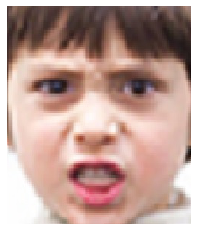

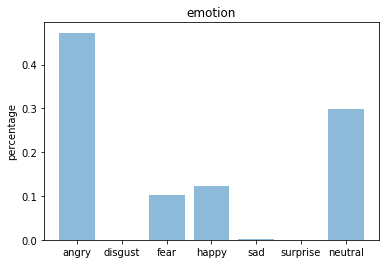

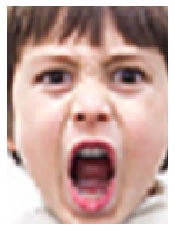

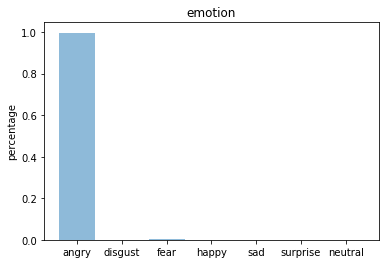

None None None None


In [0]:
print(draw_faces(filename0A, FACES0A),EMOTION_ANALYSIS(img1),draw_faces(filename1A, FACES1A),EMOTION_ANALYSIS(img2))   # Displaying the overall final result of this program 

